In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [3]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "password"
HOST = "localhost"
PORT = 5432
DATABASE = "campaign_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [52]:
 # Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
firstname VARCHAR(50)
lastname VARCHAR(50)
email VARCHAR(100)
last_update TIMESTAMP

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR(30)
currency VARCHAR(30)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_update TIMESTAMP

category
--------
category_id VARCHAR(10)
category VARCHAR(50)
last_update TIMESTAMP

subcategory
--------
subcategory_id VARCHAR(10)
subcategory VARCHAR(50)
last_update TIMESTAMP



In [53]:
conn = engine.connect() 

In [4]:
pd.read_sql_query("SELECT * FROM campaign", engine)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,last_update
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581574,1970-01-01 00:00:01.614578,cat1,subcat1,2025-01-21 21:13:33.774206
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554,1970-01-01 00:00:01.621919,cat2,subcat2,2025-01-21 21:13:33.774206
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1970-01-01 00:00:01.608185,1970-01-01 00:00:01.640844,cat3,subcat3,2025-01-21 21:13:33.774206
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1970-01-01 00:00:01.634792,1970-01-01 00:00:01.642399,cat2,subcat2,2025-01-21 21:13:33.774206
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1970-01-01 00:00:01.608530,1970-01-01 00:00:01.629695,cat4,subcat4,2025-01-21 21:13:33.774206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,1970-01-01 00:00:01.609222,1970-01-01 00:00:01.622351,cat1,subcat1,2025-01-21 21:13:33.774206
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,1970-01-01 00:00:01.634274,1970-01-01 00:00:01.638252,cat4,subcat4,2025-01-21 21:13:33.774206
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,1970-01-01 00:00:01.636175,1970-01-01 00:00:01.639116,cat4,subcat4,2025-01-21 21:13:33.774206
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,1970-01-01 00:00:01.602133,1970-01-01 00:00:01.618117,cat2,subcat8,2025-01-21 21:13:33.774206


In [64]:
df = pd.read_sql_query("SELECT * FROM campaign", engine)
df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,last_update
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581574,1970-01-01 00:00:01.614578,cat1,subcat1,2025-01-21 21:13:33.774206
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554,1970-01-01 00:00:01.621919,cat2,subcat2,2025-01-21 21:13:33.774206
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1970-01-01 00:00:01.608185,1970-01-01 00:00:01.640844,cat3,subcat3,2025-01-21 21:13:33.774206
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1970-01-01 00:00:01.634792,1970-01-01 00:00:01.642399,cat2,subcat2,2025-01-21 21:13:33.774206
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1970-01-01 00:00:01.608530,1970-01-01 00:00:01.629695,cat4,subcat4,2025-01-21 21:13:33.774206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,1970-01-01 00:00:01.609222,1970-01-01 00:00:01.622351,cat1,subcat1,2025-01-21 21:13:33.774206
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,1970-01-01 00:00:01.634274,1970-01-01 00:00:01.638252,cat4,subcat4,2025-01-21 21:13:33.774206
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,1970-01-01 00:00:01.636175,1970-01-01 00:00:01.639116,cat4,subcat4,2025-01-21 21:13:33.774206
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,1970-01-01 00:00:01.602133,1970-01-01 00:00:01.618117,cat2,subcat8,2025-01-21 21:13:33.774206


In [65]:
df.groupby(df["outcome"]).count()

,cf_id,contact_id,company_name,description,goal,pledged,backers_count,country,currency,launch_date,end_date,category_id,subcategory_id,last_update
outcome,,,,,,,,,,,,,,
canceled,57,57,57,57,57,57,57,57,57,57,57,57,57,57
failed,364,364,364,364,364,364,364,364,364,364,364,364,364,364
live,14,14,14,14,14,14,14,14,14,14,14,14,14,14
successful,565,565,565,565,565,565,565,565,565,565,565,565,565,565


In [ ]:
#There were a lot more successful campaigns than failed, canceled, or live.

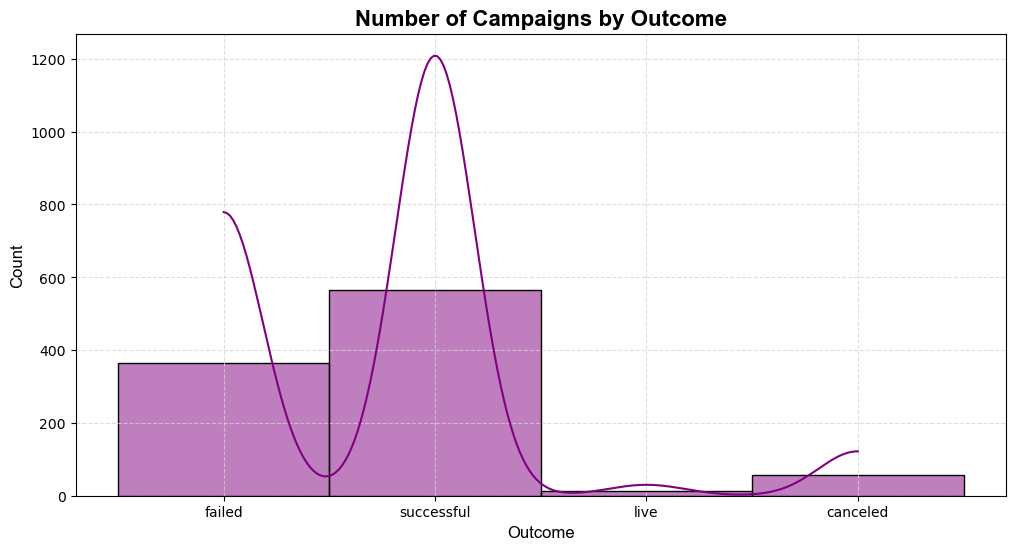

In [70]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df, x="outcome", kde=True, color="purple")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Outcome", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Number of Campaigns by Outcome", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

In [66]:
dfcount = df.groupby("category_id").count()
dfcount

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,subcategory_id,last_update
category_id,,,,,,,,,,,,,,
cat1,46,46,46,46,46,46,46,46,46,46,46,46,46,46
cat2,175,175,175,175,175,175,175,175,175,175,175,175,175,175
cat3,96,96,96,96,96,96,96,96,96,96,96,96,96,96
cat4,344,344,344,344,344,344,344,344,344,344,344,344,344,344
cat5,178,178,178,178,178,178,178,178,178,178,178,178,178,178
cat6,67,67,67,67,67,67,67,67,67,67,67,67,67,67
cat7,48,48,48,48,48,48,48,48,48,48,48,48,48,48
cat8,42,42,42,42,42,42,42,42,42,42,42,42,42,42
cat9,4,4,4,4,4,4,4,4,4,4,4,4,4,4


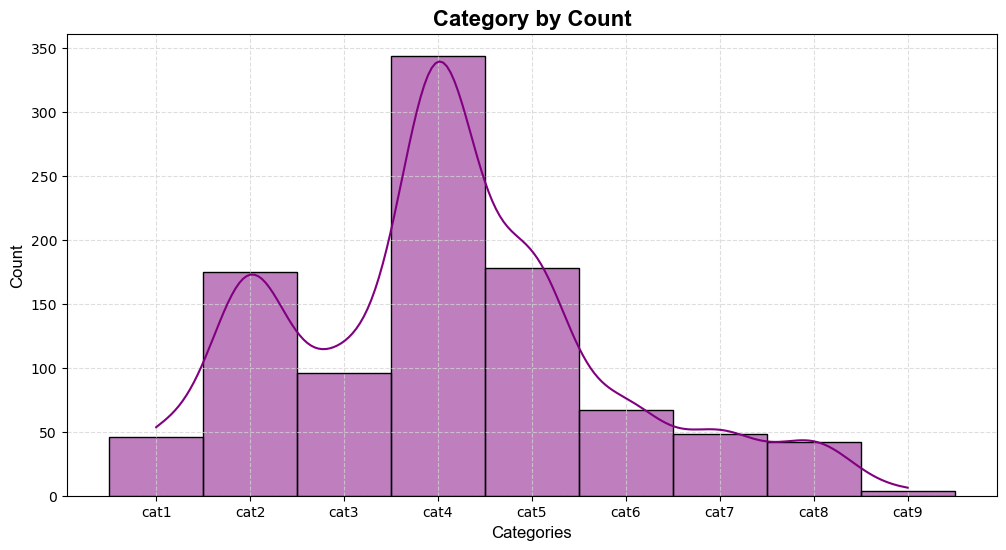

In [68]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.histplot(data=df, x="category_id", kde=True, color="purple")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Categories", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Category by Count", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# plt.xlim(0,20)

# Show/Save the Graph
plt.show()

In [34]:
df[df["outcome"] == "successful"].groupby("category_id")["outcome"].count()

category_id
cat1     22
cat2     99
cat3     64
cat4    187
cat5    102
cat6     40
cat7     21
cat8     26
cat9      4
Name: outcome, dtype: int64

In [ ]:
#The most popular category was cat4 which is Theater. 

In [30]:
df2 = pd.read_sql_query("SELECT * FROM category", engine)
df2

,category_id,category,last_update
0,cat1,food,2025-01-21 21:12:24.183130
1,cat2,music,2025-01-21 21:12:24.183130
2,cat3,technology,2025-01-21 21:12:24.183130
3,cat4,theater,2025-01-21 21:12:24.183130
4,cat5,film & video,2025-01-21 21:12:24.183130
5,cat6,publishing,2025-01-21 21:12:24.183130
6,cat7,games,2025-01-21 21:12:24.183130
7,cat8,photography,2025-01-21 21:12:24.183130
8,cat9,journalism,2025-01-21 21:12:24.183130
